In [642]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, nsolve, log

In [643]:
D = 70 # Rotor diameter [m]
z_h = 100 # hub height [m]
s_x = 10 # Streamwise distance [D]
s_y = 10 # Transverse distance [D]

U_G = 12.32 # Atmospheric Wind speed [m/s]

delta_ibl_0 = z_h

C = 4.0 # Empirical constant [-]
C_star = 4.5 # Friction velocity constant [-]

f = 1*10**(-4) # Coriolis parameter [1/s]
k = 0.4 # Von Karman constant [-]

C_T = 0.8 # Thrust coefficient [-]
C_P = 0.4 # Power coefficient [-]

rho = 1.2 # Air density [kg/m^3]
z_0lo = 0.0001 # surface rughness length [m] 

In [644]:
ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
print('Scaled Thrust Coefficient: ', round(ct, 5), '[-]')

nu_star = 28 * np.sqrt(ct)
print('Eddy Viscosity: ', round(nu_star, 2), '[-]')

beta =  nu_star / (1 + nu_star)
print('Wake Expansion Parameter: ', round(beta, 2), '[-]')

z_0hi = z_h * (1 + D/(2 * z_h))**beta * np.exp(-(ct/(2 * k**2) + (np.log(z_h / z_0lo * (1 - D/(2 * z_h))**beta))**-2)**-0.5)
print("Effective Roughness Height z0_:hi: ", round(z_0hi, 4), "m")

u_star_lo = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
print("Friction Velocity lo: ", round(u_star_lo, 4), "m/s")

u_star_hi = (k * U_G) / (np.log(U_G / (f * z_0hi)) - C_star)
print("Friction Velocity hi: ", round(u_star_hi, 4), "m/s")

U_h0 = u_star_lo / k * np.log(z_h / z_0lo)
print('Unperturbed Wind Speed: ', round(U_h0, 2), 'm/s')

z0_WF = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z_0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)
print('Effective Roughness Height z0_WF: ', round(z0_WF, 4), 'm')

Scaled Thrust Coefficient:  0.00314 [-]
Eddy Viscosity:  1.57 [-]
Wake Expansion Parameter:  0.61 [-]
Effective Roughness Height z0_:hi:  0.0367 m
Friction Velocity lo:  0.2999 m/s
Friction Velocity hi:  0.4681 m/s
Unperturbed Wind Speed:  10.36 m/s
Effective Roughness Height z0_WF:  0.2174 m


In [645]:
# Deficit function U(x)
m_l = 9 * D * s_x
x = np.linspace(0, m_l, m_l)

# Calculate h1 and h2
x1 = 0
x2 = m_l

h1 = z_h + z0_WF * ((x-x1)/z0_WF)**(4/5)
h2 = z_h + z0_WF * ((x-x2)/z0_WF)**(4/5)

# Deficit function U(x)/U0
U_x = U_h0 * (np.log(h1/z_0lo) * np.log(z_h/z0_WF)) / (np.log(h1/z0_WF) * np.log(z_h/z_0lo))


"""
plt.plot(x, U_x)
plt.xlabel('Distance [m]')
plt.ylabel('u(x) [-]')
plt.title('Wind Speed Deficit Function [Nygaard]')
plt.show()
"""

# Recovery function U(x)
x = np.linspace(m_l, m_l + 25000, 25000)

h1 = z_h + z0_WF * ((x-x1)/z0_WF)**(4/5)
h2 = z_h + z0_WF * ((x-x2)/z0_WF)**(4/5)

# Recovery function U(x)/U0
nygaard_rec = U_h0 * (np.log(h1/z_0lo) * np.log(h2/z0_WF)) / (np.log(h1/z0_WF) * np.log(h2/z_0lo))

"""
plt.plot(x, nygaard_rec)
plt.xlabel('Distance [m]')
plt.ylabel('u(x) [-]')
plt.title('Recovery of Hub-height Wind Speed [Nygaard]')
plt.ylim(4, 12)
plt.grid()
plt.show()
"""

/var/folders/j6/19hd1bln7bx6375t_4njz15w0000gn/T/ipykernel_77194/4212005215.py:10: RuntimeWarning: invalid value encountered in power
  h2 = z_h + z0_WF * ((x-x2)/z0_WF)**(4/5)


"\nplt.plot(x, nygaard_rec)\nplt.xlabel('Distance [m]')\nplt.ylabel('u(x) [-]')\nplt.title('Recovery of Hub-height Wind Speed [Nygaard]')\nplt.ylim(4, 12)\nplt.grid()\nplt.show()\n"

In [646]:
x = np.linspace(0, 25000, 25000)  # downstream x beyond the farm

# Define Fully Developed Wind Speed at the hub height as U_d
U_d = min(U_x)
a = k * u_star_lo * z_h/(2*z_h)**2
exp_rec = U_h0 + U_h0 * ((U_d)/(U_h0)-1) * np.exp(-a*x)

"""
plt.plot(x, exp_rec)
plt.xlabel('x [m]')
plt.ylabel('Uh_t_rec [m/s]')
plt.title('Exponential Recovery of Hub-height Wind Speed [Emeis]')
plt.grid(True)
plt.show()
"""

"\nplt.plot(x, exp_rec)\nplt.xlabel('x [m]')\nplt.ylabel('Uh_t_rec [m/s]')\nplt.title('Exponential Recovery of Hub-height Wind Speed [Emeis]')\nplt.grid(True)\nplt.show()\n"

10.22
10.35
10.36

10.12
10.23
10.27


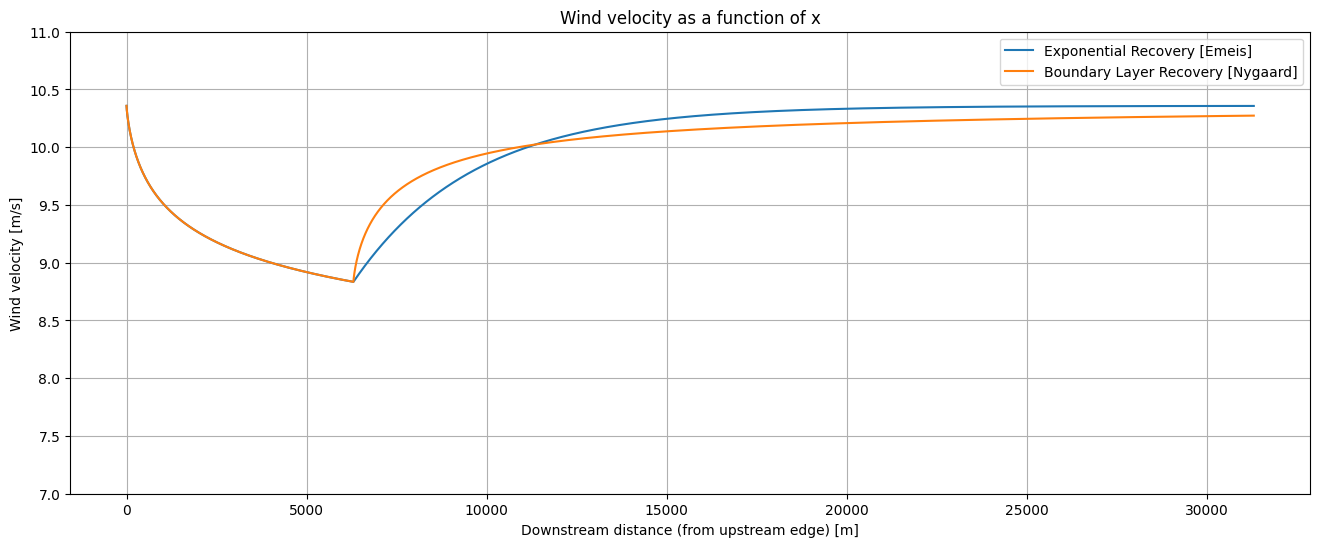

In [ ]:
x = np.linspace(0, m_l + 25000, m_l + 25000)

flow_exp_rec= np.concatenate((U_x, exp_rec))
flow_nygaard_rec= np.concatenate((U_x, nygaard_rec))

print(round(flow_exp_rec[m_l + 8000],2))
print(round(flow_exp_rec[m_l + 16000],2))
print(round(flow_exp_rec[m_l + 24000],2))
print()
print(round(flow_nygaard_rec[m_l + 8000],2))
print(round(flow_nygaard_rec[m_l + 16000],2))
print(round(flow_nygaard_rec[m_l + 24000],2))

plt.figure(figsize=(16, 6))  # Set the figure size to make it twice as wide
plt.plot(x, flow_exp_rec)
plt.plot(x, flow_nygaard_rec)
plt.legend(['Exponential Recovery [Emeis]', 'Boundary Layer Recovery [Nygaard]'])
plt.xlabel('Downstream distance (from upstream edge) [m]')
plt.ylabel('Wind velocity [m/s]')
plt.title('Wind velocity as a function of x')
plt.ylim(7, 11)
plt.grid(True)
plt.show()

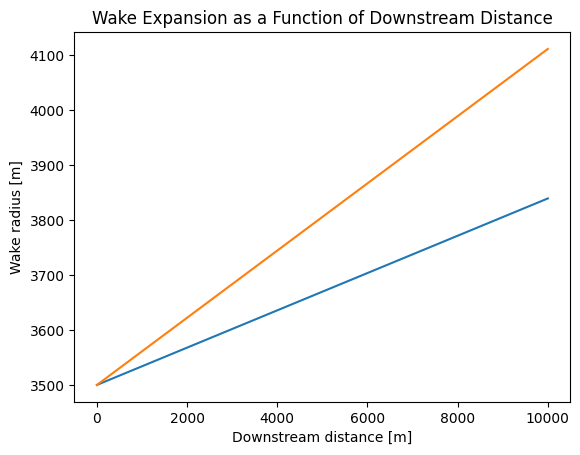

In [648]:
# Wake expansion
x = np.linspace(0, 10000, 10000)

# Wake expansion model from STIPA paper
w = 10 # Transverne number of turbines
R_f = w * D + (w-1) * s_y * D # Initial wake radius [m]
alpha = 1 # # Wake expansion factor
u_f = min(U_x) # Wind velocity at downstream edge of wind farm
k_eff = alpha * u_star_lo/u_f
R_farm_x = R_f/2 + k_eff * x

# Turbopark / FLORIS
theta = np.deg2rad(3.5)  # can be 2.5 - 5.5 degrees
R_farm_x2 = R_f/2 + x * np.tan(theta)

plt.plot(x, R_farm_x)
plt.plot(x, R_farm_x2)
plt.xlabel('Downstream distance [m]')
plt.ylabel('Wake radius [m]')
plt.title('Wake Expansion as a Function of Downstream Distance')
plt.show()


